Feature ranking:
0. feature 306 (0.014540)
1. feature 228 (0.011729)
2. feature 265 (0.010180)
3. feature 117 (0.009393)
4. feature 877 (0.008125)
5. feature 1638 (0.007930)
6. feature 1668 (0.007880)
7. feature 132 (0.007871)
8. feature 740 (0.007078)
9. feature 1667 (0.006595)


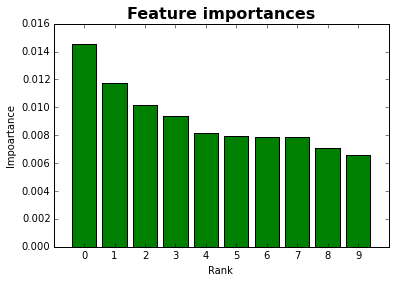

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

#讀取資料(Train Data)
#資料大小:row:10868 column:1805
mydata = pd.read_csv('/Microsoft-Malware-Challenge/Dataset/train/LargeTrain.csv')

#X,y分別是特徵矩陣和目標矩陣,ix[列(row):行(column)]
#slice >> [起始:結束:間隔]
#X取所有列(:)和0~1803行(不包含最後一行(class) >> 0:1804 ※python不會包含最後一個位移植)
X = np.array(mydata.ix[:,0:1804])

#y取所有列(:)和最後一行(1804:1805)or(1804:)
y = np.array(mydata.ix[:,1804:1805]).ravel()

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=100,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(10):
    print("%d. feature %d (%f)" % (f, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()

#Set a title of the current axes(軸)
plt.title("Feature importances",fontsize=16, fontweight='bold')

# Choose top 10
#Make a bar plot.
plt.bar(range(10), importances[indices[0:10]], color="g",align="center")

#Set the axis label of the current axis.
plt.xlabel('Rank')
plt.ylabel('Impoartance')

#Get or set the x-limits of the current tick locations and labels.
#例如 : plt.xticks(locations, labels)
plt.xticks(range(10), range(10))

#Get or set the x limits of the current axes.
plt.xlim([-1, 10])# set the xlim to xmin, xmax
plt.show()